In [1]:
from swarms import SizeDistribution
from swarms import CollSwarm
from numpy import linspace, zeros, logspace
import matplotlib.pyplot as plt

# Jupiter: An Example

For the following plots, the specifications of Jupiter will be used to demonstrate the different possible plots that swarms.py can produce. 

In [3]:
Dmin = 12e-6; Dmax = 15e4; M_init = 7.37307e19

jupiter = SizeDistribution(Dmin, Dmax, M0=M_init)

In [5]:
initial_swarm_mass = jupiter.Mtot()
initial_swarm_area = jupiter.Atot()
print("Swarm mass = {0:.5e} kg".format(initial_swarm_mass))
print("Swarm area = {0:.5e} m^2".format(initial_swarm_area))

Swarm mass = 7.39324e+19 kg
Swarm area = 9.18122e+16 m^2


## Area Plot

One can plot the total surface area of a swarm over time by repeatedly updating the swarm for every needed time step and record the specific area at that time. There is the option to specify a dynamic maximum object size that would decrease over time as specified in Kennedy 2010.

In [4]:
M0 = 7.37307e19; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)
jupiter_no_correct = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=False)

In [5]:
time = linspace(0, 1e10, 50000)
area_correct = zeros(50000)
area_no_correct = zeros(50000)

for i in range(len(time)):
    a = jupiter_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    b = jupiter_no_correct.computeAtot()*4.4683677582981e-23 # change units into AU
    area_correct[i] = a
    area_no_correct[i] = b
    jupiter_correct.updateSwarm(time[i])
    jupiter_no_correct.updateSwarm(time[i])

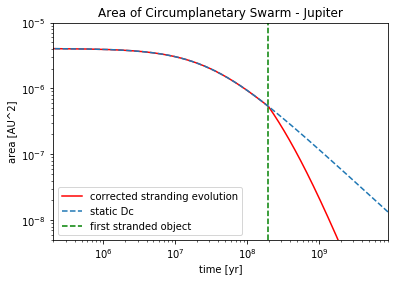

In [6]:
plt.loglog(time, area_correct, 'r', label="corrected stranding evolution")
plt.loglog(time, area_no_correct, ls='--', label="static Dc")
plt.axvline(jupiter_correct.tnleft, color='g', ls='--', label="first stranded object")
plt.xlabel("time [yr]")
plt.ylabel("area [AU^2]")
plt.title("Area of Circumplanetary Swarm - Jupiter")
plt.legend()
plt.xlim([2e5, 9e9])
plt.ylim([5e-9, 1e-5])
plt.show()

## Number Density Plot

Since it is possible to compute the number of objects in the swarm at any time with our code, an other possible plot that can be made is a size-distribution plot for logarithmic spaced times. 

In [8]:
jupiter_num = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

In [9]:
drange = linspace(0.1, 250000, 5000)
time_log = logspace(0, 10, 20)
num_distribution = []
for i in range(len(time_log)):
    jupiter_num.updateSwarm(time_log[i])
    num = []
    for j in range(len(drange)):
        num.append(jupiter_num.computen(drange[j]))
    num_distribution.append(num)

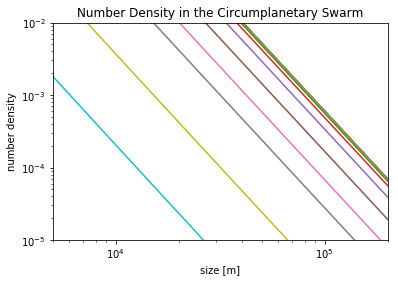

In [10]:
for i in range(len(num_distribution)):
    plt.loglog(drange, num_distribution[i])
plt.xlim([5000, 200000])
plt.ylim([1e-5, 1e-2])
plt.xlabel("size [m]")
plt.ylabel("number density")
plt.title("Number Density in the Circumplanetary Swarm")
plt.show()

# Observable Quantities

## Flux Computations

We now demonstrate the important computations of thermal radiation flux as well as scattering flux produced by both the planet and the circumplanetary swarm. These values are critical, since they are the observable variables. The distance from the solar system, d_pl, used is 10 pc. We take a Jupiter mass planet orbiting an A5 main-sequence star.  

In [2]:
M0 = 10 * 7.34767309e22; Dt = 100.; Dmax = 250000.; L_s = 20 * 3.828e26;
M_s = 1.86 * 1.989e30; M_pl = 1.89587112e27; a_pl = 7.48e12
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = 3.086e17

jupiter5 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

jupiter5.updateSwarm(1e7) # Update the swarm to 4.5e9 years. 

waverange = logspace(-7, -3, 200)
Fth_planet = jupiter5.computeFth(waverange, planet=True)/1e-26
Fth_swarm = jupiter5.computeFth(waverange, swarm=True)/1e-26
Fs_planet = jupiter5.computeFs(waverange, 1., 0.52, planet=True)/1e-26
Fs_swarm = jupiter5.computeFs(waverange, 0.32, 0.08, swarm=True)/1e-26

C:\Users\loloynage\Documents\CE-Irregular-Satellites\swarms.py:210: RuntimeWarning: overflow encountered in exp
  b = 1/(exp(h*(c/lamb)/(k_B*T)) - 1)


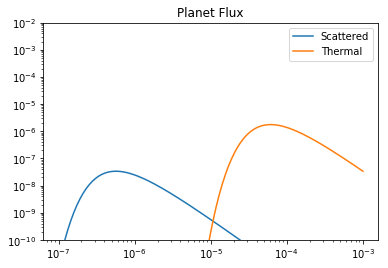

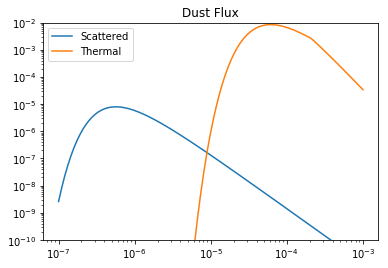

In [3]:
plt.figure(3)
plt.title('Planet Flux')
plt.loglog(waverange, Fs_planet, label="Scattered")
plt.loglog(waverange, Fth_planet, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

plt.figure(4)
plt.title('Dust Flux')
plt.loglog(waverange, Fs_swarm, label="Scattered")
plt.loglog(waverange, Fth_swarm, label="Thermal")
plt.ylim([10e-11, 10e-3])
plt.legend()
plt.show()

# Evolution of Debris Population

In [2]:
M0 = 7.37307e19; Dt = 100.; Dmax = 150000.; L_s = 3.828e26;
M_s = 1.989e30; M_pl = 1.89587112e27; a_pl = 7.7792e11
R_pl = 6.9911e7; eta = 0.4; Nstr = 6.; d_pl = a_pl

jupiter6 = CollSwarm(M0, Dt, Dmax, L_s, M_s, M_pl, a_pl, R_pl, eta, Nstr, d_pl, correction=True)

drange = linspace(0.01, 5e5, 2500)
time_log = logspace(6, 9.5, 10)
total_amount = []

# Testing
# num = []
# print(jupiter6.computeNtot(dlow=160000))
# for j in range(len(drange)):
#    num.append(jupiter6.computeNtot(dlow=drange[j]))
# total_amount.append(num)

for i in range(len(time_log)):
    jupiter6.updateSwarm(time_log[i])
    num = []
    print(i)
    for j in range(len(drange)):
        num.append(jupiter6.computeNtot(dlow=drange[j]))
    total_amount.append(num)

0
ks_val =  28456943434124.367
kg_val =  1795511746121.821
lower =  -41958716.13237874
upper =  4231.663772310585
qg =  1.7
ks_val =  28456943434124.367
kg_val =  1795511746121.821
lower =  -41958877.83830642
upper =  1524.7127957540795
qg =  1.7
ks_val =  28456943434124.367
kg_val =  1795511746121.821
lower =  -41958922.88984426
upper =  510.9593014849973
qg =  1.7
ks_val =  28456943434124.367
kg_val =  1795511746121.821
lower =  -41958936.12541085
upper =  87.76347741871821
qg =  1.7
ks_val =  28456943434124.367
kg_val =  1795511746121.821
lower =  -41958936.33779991
upper =  78.39349478879977
qg =  1.7
ks_val =  28456943434124.367
kg_val =  1795511746121.821
lower =  -41958937.37091458
upper =  27.22654313445122
qg =  1.7
ks_val =  28456943434124.367
kg_val =  1795511746121.821
lower =  -41958937.63012835
upper =  11.444149110633377
qg =  1.7
ks_val =  28456943434124.367
kg_val =  1795511746121.821
lower =  -41958937.65542378
upper =  9.754213688584876
qg =  1.7
ks_val =  2845694343

lower =  -19806111.301483016
upper =  -0.5411231735957507
qg =  1.7
ks_val =  13432689635784.035
kg_val =  847545418182.0923
lower =  -19806111.307241686
upper =  -1.0256118675041301
qg =  1.7
ks_val =  13432689635784.035
kg_val =  847545418182.0923
lower =  -19806111.32057358
upper =  -2.2132558561628457
qg =  1.7
ks_val =  13432689635784.035
kg_val =  847545418182.0923
lower =  -19806111.33255057
upper =  -3.4007561301291793
qg =  1.7
ks_val =  13432689635784.035
kg_val =  847545418182.0923
lower =  -19806111.333173957
upper =  -3.467428333726689
qg =  1.7
ks_val =  13432689635784.035
kg_val =  847545418182.0923
lower =  -19806111.334431026
upper =  -3.603881253806086
qg =  1.7
ks_val =  13432689635784.035
kg_val =  847545418182.0923
lower =  -19806111.33604889
upper =  -3.7838968109235847
qg =  1.7
ks_val =  13432689635784.035
kg_val =  847545418182.0923
lower =  -19806111.33683072
upper =  -3.872890063552138
qg =  1.7
ks_val =  13432689635784.035
kg_val =  847545418182.0923
lower =

ks_val =  2139706332323.7483
kg_val =  135006342541.04483
lower =  -3154934.939578797
upper =  -0.7966987966782885
qg =  1.7
8
ks_val =  449142478694.4017
kg_val =  28338974565.02719
lower =  -662246.021127078
upper =  35.17228256990464
qg =  1.7
ks_val =  449142478694.4017
kg_val =  28338974565.02719
lower =  -662246.5766767297
upper =  24.777501465958377
qg =  1.7
ks_val =  449142478694.4017
kg_val =  28338974565.02719
lower =  -662246.7947161474
upper =  20.358775686237163
qg =  1.7
ks_val =  449142478694.4017
kg_val =  28338974565.02719
lower =  -662247.5456189287
upper =  0.7821852827515989
qg =  1.7
ks_val =  449142478694.4017
kg_val =  28338974565.02719
lower =  -662247.557970502
upper =  0.06847089630050021
qg =  1.7
ks_val =  449142478694.4017
kg_val =  28338974565.02719
lower =  -662247.5582774264
upper =  0.045619675426012404
qg =  1.7
ks_val =  449142478694.4017
kg_val =  28338974565.02719
lower =  -662247.558521621
upper =  0.026961418340974833
qg =  1.7
ks_val =  44914247

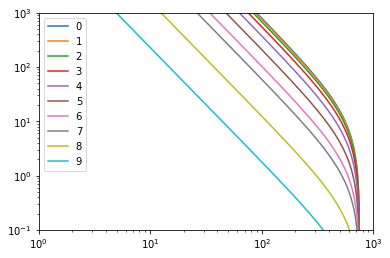

In [3]:
for i in range(len(total_amount)):
    plt.loglog(total_amount[i], label=i)

plt.legend()
plt.ylim([1e-1, 1e3])
plt.xlim([1e0, 1e3])
plt.show()